<a href="https://colab.research.google.com/github/HemzJack/HemzJack/blob/main/DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Download Dataset

In [1]:
!pip install -q kaggle

1.1 uploaded kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!chmod 600 ~/.kaggle/kaggle.json #fungsi untuk memberikan izin akses file

1.2 Processing Download

In [4]:
!kaggle datasets download -d akshaydattatraykhare/diabetes-dataset

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 12.2MB/s]


In [5]:
import zipfile

with zipfile.ZipFile('diabetes-dataset.zip','r') as zip_ref:
  zip_ref.extractall('/content/')

2. Import Library

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


3. Load & Display Dataset

In [7]:
df = pd.read_csv('/content/diabetes.csv')
display(df.head(2)) #Display first record of data
display(df.tail(2)) #Display last 4 record of data
display(df.sample(4)) #Display randomly any number of record of data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
705,6,80,80,36,0,39.8,0.177,28,0
98,6,93,50,30,64,28.7,0.356,23,0
12,10,139,80,0,0,27.1,1.441,57,0
533,6,91,0,0,0,29.8,0.501,31,0


3.1 The shape of dataset

In [8]:
#number of rows and colums
df.shape

(768, 9)

3.2 List types of all columns

In [9]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

3.3 Info of the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


3.4 Summary of the dataset

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


4. Data Cleaning

4.1 Drop the duplicate

In [12]:
#check the shape before drop duplicate
df.shape

(768, 9)

In [13]:
df=df.drop_duplicates()

In [14]:
#check the shape after drop the duplicate
df.shape

(768, 9)

4.2 check the NULL value

In [15]:
#check of null values,
#check the ,issing value in any column,
#display number of null value in every column in dataset.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
print('No of zero values in Glucose', df[df['Glucose']==0].shape[0])

No of zero values in Glucose 5


In [18]:
print('No of zero values in BloodPressure', df[df['BloodPressure']==0].shape[0])

No of zero values in BloodPressure 35


In [19]:
print('No of zero values in SkinThickness', df[df['SkinThickness']==0].shape[0])

No of zero values in SkinThickness 227


In [20]:
print('No of zero values in Insulin', df[df['Insulin']==0].shape[0])

No of zero values in Insulin 374


In [21]:
print('No of zero values in BMI', df[df['BMI']==0].shape[0])

No of zero values in BMI 11


Replace the no of zero value with mean of columns

In [22]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
print('no of zero value in Glucose',df[df['Glucose']==0].shape[0])

no of zero value in Glucose 0


In [23]:
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['Insulin'].mean())

In [24]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,33.692138,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,12.341487,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.825000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,118.660163,2.420000,81.000000,1.000000


Negative (0):  500
Positive (1):  268


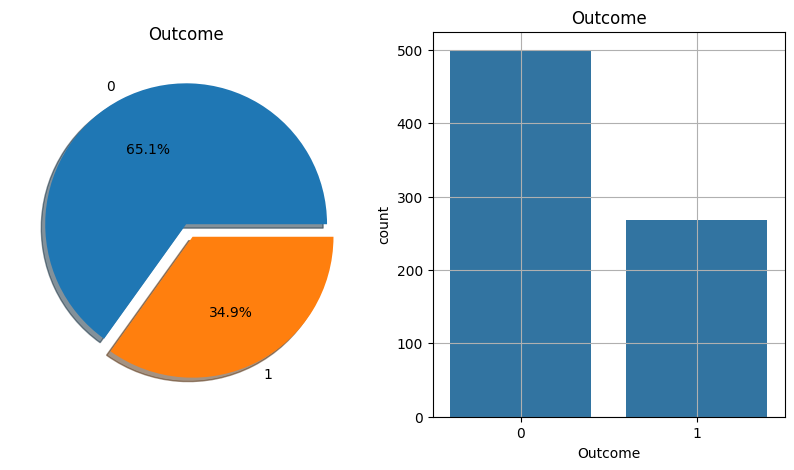

In [25]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot(x='Outcome',data=df,ax=ax[1])
ax[1].set_title('Outcome')
N,P=df['Outcome'].value_counts()
print('Negative (0): ',N)
print('Positive (1): ',P)
plt.grid()
plt.show()

Histogram of each feature

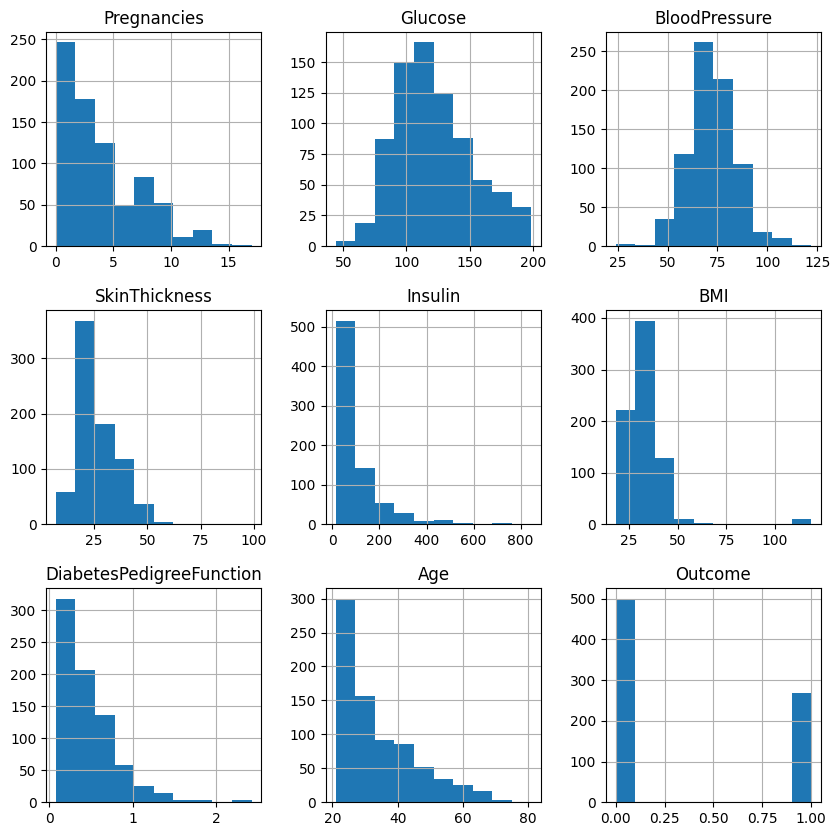

In [26]:
df.hist(bins=10,figsize=(10,10))
plt.show()

Scatter Plaot

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

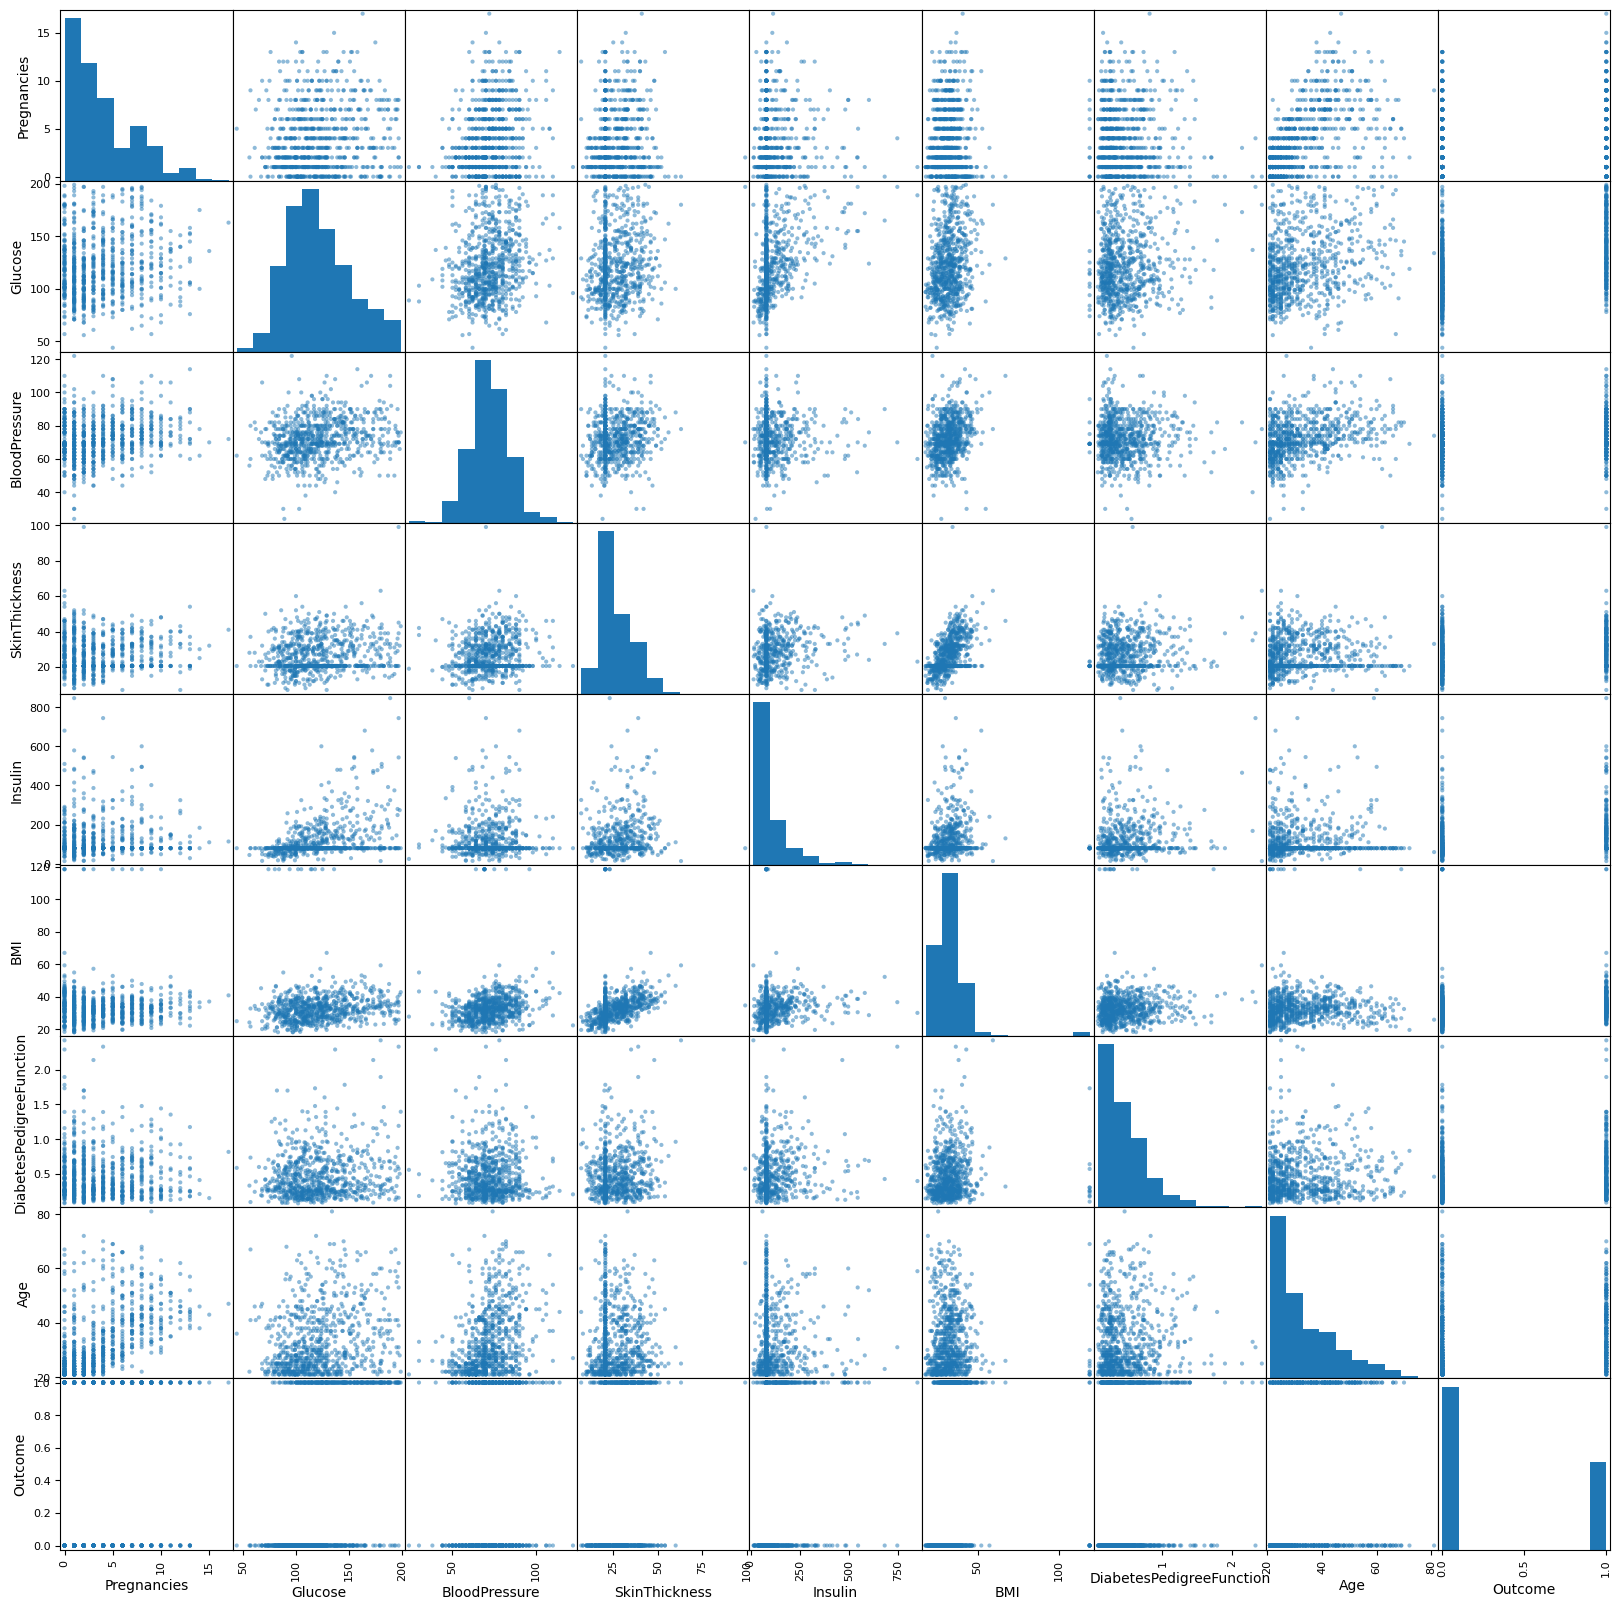

In [61]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize =(20,20))

Analyzing relationships between variable

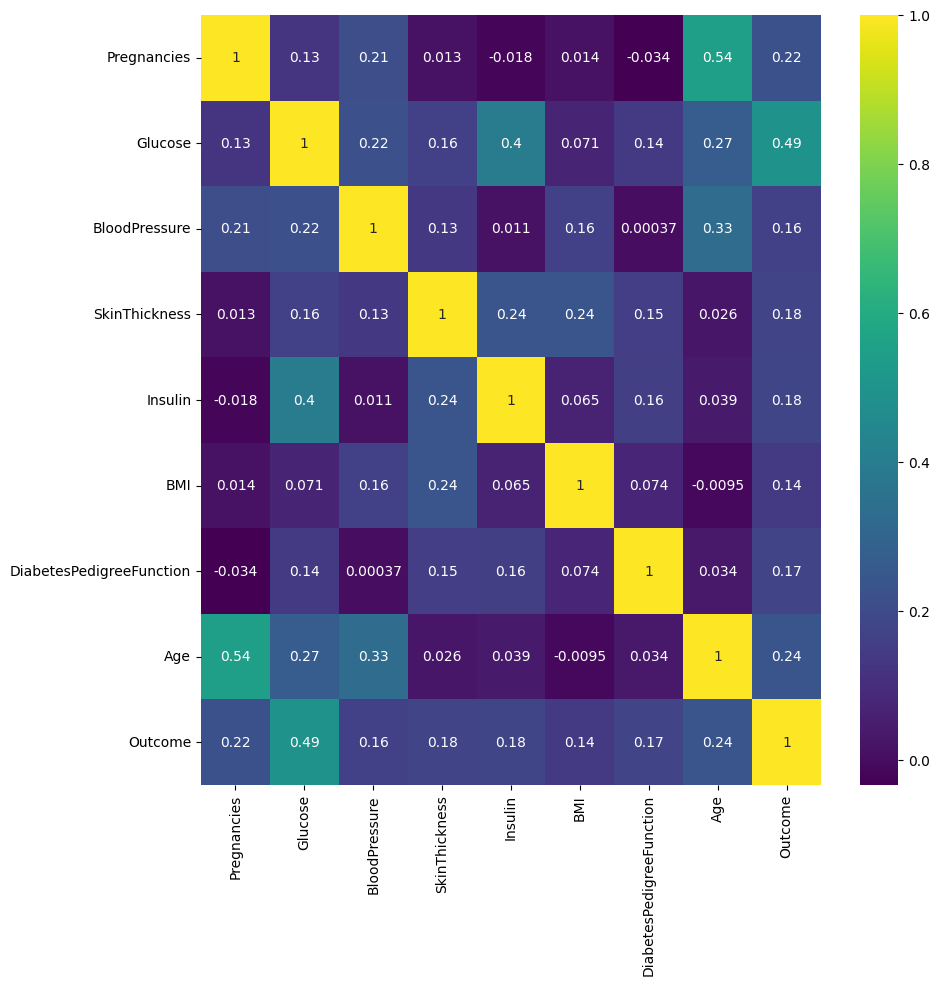

In [62]:
import seaborn as sns
corrmat=df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="viridis")

5. Split the data frame into X & Y

In [65]:
target_name = 'Outcome'
y = df[target_name]
x = df.drop(target_name, axis=1)

x.head()
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Apply Feature Scalling

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
SSX = scaler.transform(x)

7. Train Test Split

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(SSX, y, test_size=0.2, random_state=7)

x_train.shape, y_train.shape

x_test.shape, y_test.shape

((154, 8), (154,))

8. Build the Classification Algorithm SVM

In [69]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train, y_train)

SVC()

9. Making Prediction

SVM

In [70]:
sv_pred=sv.predict(x_test)

sv_pred.shape

(154,)

10) Model Evaluation

10.1 Train Score & Test Score

In [71]:
#Train Score & Test score SVM
from sklearn.metrics import accuracy_score
print("Train Accuracy of SVM", sv.score(x_train, y_train)*100)
print("Accuracy (test) score of SVM", sv.score(x_test, y_test)*100)
print("Accuracy (test) score of SVM", accuracy_score(y_test, sv_pred)*100)

Train Accuracy of SVM 80.94462540716613
Accuracy (test) score of SVM 81.81818181818183
Accuracy (test) score of SVM 81.81818181818183


Confusion Matrix of "SVM"

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
#Confusion Matrix of Logistic Regression
cm=confusion_matrix(y_test, sv_pred)

<Axes: >

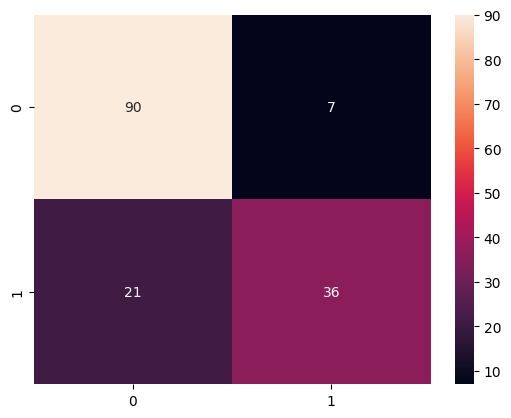

In [73]:
sns.heatmap(confusion_matrix(y_test, sv_pred), annot=True,fmt='d')

In [74]:
print('Classification Report of SVM : \n', classification_report(y_test,sv_pred,digits=4))

Classification Report of SVM : 
               precision    recall  f1-score   support

           0     0.8108    0.9278    0.8654        97
           1     0.8372    0.6316    0.7200        57

    accuracy                         0.8182       154
   macro avg     0.8240    0.7797    0.7927       154
weighted avg     0.8206    0.8182    0.8116       154



In [75]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,1]
TP = cm[1,1]

TN, FP, FN, TP

(90, 7, 36, 36)

In [76]:
#Making the confusion Matrix of SVM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm=confusion_matrix(y_test, sv_pred)

In [77]:
print('TN - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate of SVM:{}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification Rate of SVM:{}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN - True Negative 90
FP - False Positive 7
FN - False Negative 21
TP - True Positive 36
Accuracy Rate of SVM:81.81818181818183
Misclassification Rate of SVM:18.181818181818183


<Axes: >

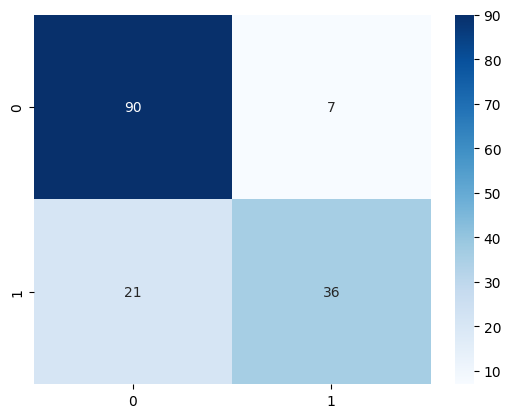

In [78]:
sns.heatmap(confusion_matrix(y_test,sv_pred),cmap='Blues', annot=True, fmt="d")

Classification Report of SVM

In [79]:
print('Classification Report of SVM : \n', classification_report(y_test,sv_pred,digits=4))

Classification Report of SVM : 
               precision    recall  f1-score   support

           0     0.8108    0.9278    0.8654        97
           1     0.8372    0.6316    0.7200        57

    accuracy                         0.8182       154
   macro avg     0.8240    0.7797    0.7927       154
weighted avg     0.8206    0.8182    0.8116       154



In [80]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,1]
TP = cm[1,1]

TN, FP, FN, TP

(90, 7, 36, 36)

In [81]:
#PRECISION (PPV-Positive Prediction Value)
#Precision = TP/(TP+FP), where TP = True Positive, FP = False Positive
TP,FP

(36, 7)

In [82]:
Precision=TP/(TP+FP)
Precision

0.8372093023255814

In [83]:
precision_score = TP/float(TP+FP)*100
print('Precision Score : {0:0.4f}'.format(precision_score))

Precision Score : 83.7209


In [84]:
from sklearn.metrics import precision_score
print("Precision Score is :", precision_score(y_test, sv_pred)*100)
print("Micro Average Precision Score is :",precision_score(y_test,sv_pred,average='micro')*100)
print("Macro Average Precision Score is :",precision_score(y_test,sv_pred,average='macro')*100)
print("Weighted Average Precision Score is :",precision_score(y_test,sv_pred,average='weighted')*100)
print("Precision Score on non weighted Precision Score is :",precision_score(y_test,sv_pred,average=None)*100)

Precision Score is : 83.72093023255815
Micro Average Precision Score is : 81.81818181818183
Macro Average Precision Score is : 82.40100565681962
Weighted Average Precision Score is : 82.05816810467972
Precision Score on non weighted Precision Score is : [81.08108108 83.72093023]


In [85]:
recall_score = TP/float(TP+FN)*100
print('recall_score',recall_score)

recall_score 50.0


In [86]:
TP,FN

recall_score=TP/FN

In [87]:
from sklearn.metrics import recall_score
print('Recall Sensitivity_score :',recall_score(y_test,sv_pred)*100)

Recall Sensitivity_score : 63.1578947368421


In [88]:
print("Micro Average Precision Score is :",precision_score(y_test,sv_pred,average='micro')*100)
print("Macro Average Precision Score is :",precision_score(y_test,sv_pred,average='macro')*100)
print("Weighted Average Precision Score is :",precision_score(y_test,sv_pred,average='weighted')*100)
print("Precision Score on non weighted Precision Score is :",precision_score(y_test,sv_pred,average=None)*100)

Micro Average Precision Score is : 81.81818181818183
Macro Average Precision Score is : 82.40100565681962
Weighted Average Precision Score is : 82.05816810467972
Precision Score on non weighted Precision Score is : [81.08108108 83.72093023]


In [89]:
print('Classification Report of Neutral Network: \n', classification_report(y_test,sv_pred,digits=4))

Classification Report of Neutral Network: 
               precision    recall  f1-score   support

           0     0.8108    0.9278    0.8654        97
           1     0.8372    0.6316    0.7200        57

    accuracy                         0.8182       154
   macro avg     0.8240    0.7797    0.7927       154
weighted avg     0.8206    0.8182    0.8116       154



In [90]:
#FALSE POSITIVE RATE (FPR)
FPR=FP/float(FP+TN)*100
print('False Positive Rate :{0:0.4f}'.format(FPR))
FP,FN

False Positive Rate :7.2165


(7, 36)

In [91]:
14/(14+83)

0.14432989690721648

In [92]:
#SPECIFICITY
specificity=TN/(TN+FP)*100
print('Specificity :{0:0.4f}'.format(specificity))

Specificity :92.7835


F1 Score

In [93]:
from sklearn.metrics import f1_score
print('f1_score of macro:',f1_score(y_test,sv_pred)*100)

f1_score of macro: 72.0


In [94]:
print("Micro Average F1 Score is :",f1_score(y_test,sv_pred,average='micro')*100)
print("Macro Average F1 Score is :",f1_score(y_test,sv_pred,average='macro')*100)
print("Weighted Average F1 Score is :",f1_score(y_test,sv_pred,average='weighted')*100)
print("F1 Score on non weighted Score is :",f1_score(y_test,sv_pred,average=None)*100)

Micro Average F1 Score is : 81.81818181818183
Macro Average F1 Score is : 79.26923076923077
Weighted Average F1 Score is : 81.15734265734265
F1 Score on non weighted Score is : [86.53846154 72.        ]


ROC AUC of SVM

In [95]:
#Area under Curve
auc=roc_auc_score(y_test,sv_pred)
print("ROC AUC SCORE of SVM is ",auc)

ROC AUC SCORE of SVM is  0.7797069994574064


In [64]:
from sklearn.metrics import roc_auc_score
auc=round(roc_auc_score(y_test,sv_pred)*100,2)
print("ROC AUC SCORE of SVM is ",auc)

ROC AUC SCORE of SVM is  77.97


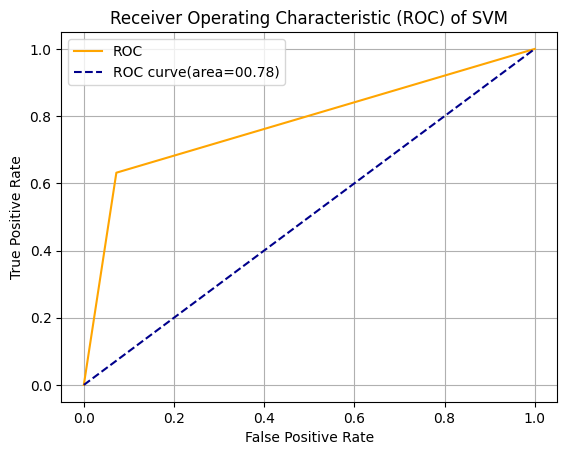

In [96]:
fpr, tpr, tresholds=roc_curve(y_test,sv_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=0%.2f)'%auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) of SVM')
plt.legend()
plt.grid()
plt.show()